In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
wine_df = pd.read_csv('Wine.csv')
wine_df.shape

(178, 13)

# Outlier Treatment

In [4]:
import numpy as np
feature=['Malic_Acid','Ash','Ash_Alcanity','Magnesium','Proanthocyanins','Color_Intensity','Hue']
for i in feature:
    Q1=np.percentile(wine_df[i], 25, interpolation='midpoint')
    Q2=np.percentile(wine_df[i], 50, interpolation='midpoint')
    Q3=np.percentile(wine_df[i], 75, interpolation='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    filt_for_del=(wine_df[i]>up_lim) | (wine_df[i]<low_lim)
    slice_for_del=wine_df.loc[filt_for_del,:]
    index_to_del=slice_for_del.index
    index_to_del_list = index_to_del.to_list()
    wine_df.drop(index_to_del_list, inplace=True)

In [5]:
wine_df.shape

(161, 13)

# Scaling the data using Standard Scaler

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data= scaler.fit_transform(wine_df)
scaled_data= pd.DataFrame(scaled_data, columns=wine_df.columns)
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02
mean,3.082420e-15,-1.130910e-16,8.936951e-16,-7.033711e-17,-2.770386e-16,1.999781e-17,-5.047722e-16,-3.020358e-16,-4.585704e-17,2.358362e-16,9.336907e-16,-8.137038e-17,-2.965192e-17
std,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00
min,-2.059161e+00,-1.502862e+00,-2.755979e+00,-2.732175e+00,-2.312593e+00,-2.074034e+00,-1.724192e+00,-1.885730e+00,-2.203572e+00,-1.747222e+00,-1.924002e+00,-1.898052e+00,-1.501825e+00
25%,-8.423697e-01,-6.743920e-01,-5.583556e-01,-7.084969e-01,-8.566089e-01,-9.257223e-01,-8.451773e-01,-7.329132e-01,-5.832379e-01,-8.209962e-01,-7.703344e-01,-8.716036e-01,-7.948163e-01
50%,4.487390e-02,-4.363261e-01,-1.931581e-02,-1.013934e-01,-4.772894e-02,6.310167e-02,1.053853e-01,-1.565048e-01,-1.147075e-01,-1.088726e-01,1.415929e-02,2.251497e-01,-2.487783e-01
75%,8.307182e-01,7.444810e-01,7.270469e-01,5.731660e-01,5.993751e-01,8.286428e-01,8.924102e-01,5.845916e-01,6.466544e-01,5.427439e-01,7.525063e-01,7.875873e-01,8.401414e-01
max,2.275658e+00,2.734712e+00,2.302702e+00,2.596844e+00,2.864239e+00,2.551110e+00,1.945184e+00,2.478505e+00,2.676953e+00,2.627916e+00,2.275347e+00,1.940584e+00,2.923292e+00


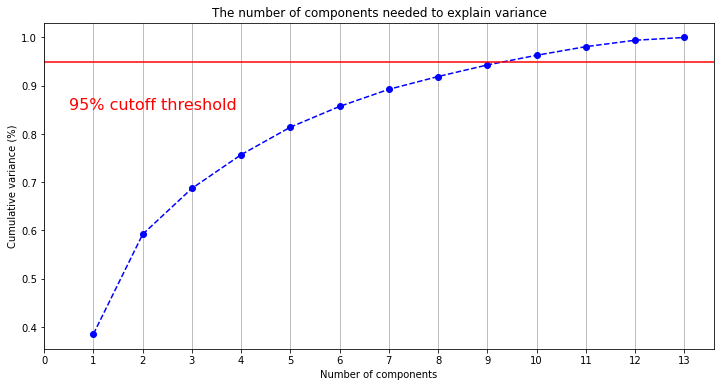

In [8]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_data)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1,14,step=1)
y= np.cumsum(pca.explained_variance_ratio_)


plt.ylim = (0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color = 'b')
plt.xlabel('Number of components')
plt.xticks(np.arange(0,14,step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cutoff threshold', color = 'red', fontsize = 16)

ax.grid(axis='x')
plt.show()

# Doing PCA

In [9]:
pca = PCA(n_components = 9)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(161, 9)

# KMeans

C:\Users\Dilip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1973.6690071742523
1334.3657269977632
962.0434505687807
878.7275860447518
820.3729456109883
773.6018000544801
735.138598404961
699.9062815465635
657.3362873291366
638.2389838345312


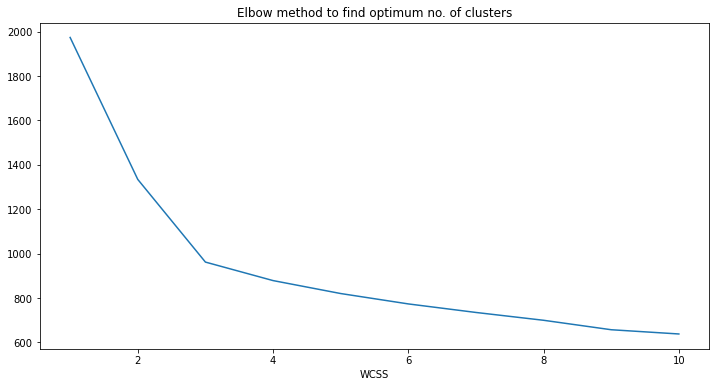

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method to find optimum no. of clusters')
plt.xlabel('WCSS')
plt.show()

**The number of clusters as shown by the PCA method is 3, for KMeans. Let us create the model using this:**

In [11]:
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=42)
y_means=kmeans.fit_predict(x_pca)
Categ_df=pd.DataFrame(data=y_means,columns=["Category"])
KMeansFinal_df=wine_df.join(Categ_df)

In [12]:
KMeansFinal_df['Category'].value_counts()

2.0    55
0.0    51
1.0    39
Name: Category, dtype: int64

**According to the PCA procedure, using KMeans, with Normalized data, we have 3 categories:** ***category 0 with 51 datapoints, category 1 with 39 datapoints and category 2 with 55 datapoints***.**Now, let us attempt the AHC**

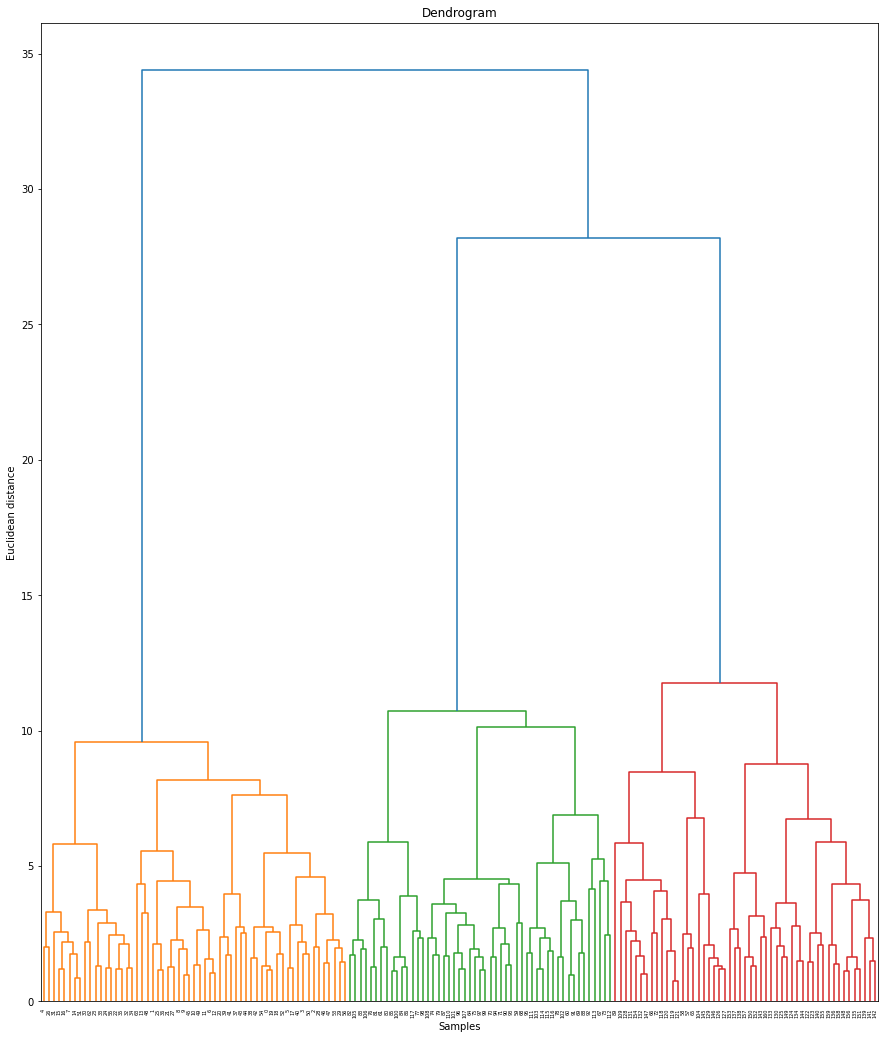

In [13]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,18))
dendrogram = sch.dendrogram(sch.linkage(x_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distance')
#plt.hlines(0.5,0,5000, colors="r", linestyles="dashed")
#plt.hlines(0.08,0,5000, colors="r", linestyles="dashed")
plt.show()

**Again, it is clear that there are 3 categories in the given dataset, as per PCA, using AHC**

In [14]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x_pca)
CategHC_3_df=pd.DataFrame(data=y_hc,columns=["Category_HC_3"])
Final_HC_3_df=wine_df.join(CategHC_3_df)
Final_HC_3_df["Category_HC_3"].value_counts()

1.0    57
0.0    44
2.0    44
Name: Category_HC_3, dtype: int64

**This time, after creating a model using AHC, based on PCA procedure, we have 3 categories:** ***category 0 with 44 datapoints, category 1 with 57 datapoints and category 2 with 44 datapoints***.**Let us make a crosstab and compare the counts**

In [15]:
pd.crosstab(KMeansFinal_df['Category'],Final_HC_3_df["Category_HC_3"])

Category_HC_3,0.0,1.0,2.0
Category,,,
0.0,6,2,43
1.0,38,0,1
2.0,0,55,0


**There are some similarities in the categories:***

***Category 0 of KMeans corresponds to category 2 of AHC***

***Category 1 of KMeans corresponds to category 0 of AHC***

***Category 2 of KMeans corresponds to category 1 of AHC***

**However even among these, there are minor differences(9)in the classification of KMeans and AHC as shown by the 6,2 and 1 on crosstab**


# Thank You...